In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

In [2]:
# Set the style of seaborn plots
sns.set_theme(style='darkgrid')

# Define full features, policy names, titles
featnames = {'lexdiv': 'Lexical Diversity',
            'sentclass': 'Sentiment',
            'sim': 'Topical Similarity',
            'smog': 'Readability'}
polnames = {'chron': 'Chronological',
            'least-neg-abs': 'Rev. Downvotes',
            'neg-abs': 'Downvotes',
            'pos-abs': 'Upvotes',
            'pos-rel': 'Relative Votes',
            'rev-chron': 'Rev. Chronological',
            'pred-nb': 'Pred. Upvotes (NBR)',
            'pred-rf': 'Pred. Upvotes (RF)',            
            'pin-pred-lr': 'Pred. Editors\' Picks (LR)',
            'pin-pred-rf': 'Pred. Editors\' Picks (RF)',
            'random': 'Random',
            'policy_chron': 'Chronological',
            'policy_least-neg-abs': 'Rev. Downvotes',
            'policy_neg-abs': 'Downvotes',
            'policy_pos-abs': 'Upvotes',
            'policy_pos-rel': 'Relative Votes',
            'policy_rev-chron': 'Rev. Chronological',
            'policy_random': 'Random',
            'policy_pin-pred-lr': 'Pred. Editors\' Picks (LR)',
            'policy_pin-pred-rf': 'Pred. Editors\' Picks (RF)',
            'policy_pred-nb': 'Pred. Upvotes (NBR)',
            'policy_pred-rf': 'Pred. Upvotes (RF)',
            'replies_rh': 'Replies Hidden',
            'replies_rt': 'Reply Trees Shown',
            'replies_rl': 'Replies Loose',
            'replies hidden': 'Replies Hidden',
            'reply trees': 'Reply Trees Shown',
            'replies loose': 'Replies Loose',
            'pinned': 'Editors\' Picks Pinned',
            'not_pinned': 'Editors\' Picks Not Pinned'}
titles = {'10': 'First 10 Comments','N': 'Full Comment Discussion'}
repl = {'rh': 'Hidden',
        'rt': 'Trees',
        'rl': 'Loose'}


# Function to parse policy elements from policy name
def policynameparse(x):
    if x.startswith('policy_'):
        x = x[7:]

    spl = x.split('_')
    policy = polnames[spl[0]]
    replies = repl[spl[-1]]
    pinned = 'Pinned' if 'pinned' in x else 'Not Pinned'

    return policy, replies, pinned

# Dictionary to map feature names to colors
color_dict = dict(zip(['Lexical Diversity', 'Sentiment', 'Topical Similarity',
                      'Readability'], [sns.color_palette("colorblind")[:4]]))

In [3]:
q_df = pd.read_csv('data/q_df.csv')
q_df['n'] = q_df['n'].astype(str)
q_df

/var/folders/3m/k3bhjj_54975gvpvvrkv8x6w0000gn/T/ipykernel_29720/861304051.py:1: DtypeWarning: Columns (3) have mixed types. Specify dtype option on import or set low_memory=False.
  q_df = pd.read_csv('data/q_df.csv')


,discussion,sorting policy,value,n,feature,policy,replies,pinned,policy_chron,policy_least-neg-abs,...,policy_pin-pred-rf,policy_pos-abs,policy_pos-rel,policy_pred-nb,policy_pred-rf,policy_random,policy_rev-chron,replies_rh,replies_rl,replies_rt
0,1,chron_rh,0.337720,10,lexdiv,chron,rh,0,1,0,...,0,0,0,0,0,0,0,1,0,0
1,2,chron_rh,-0.125603,10,lexdiv,chron,rh,0,1,0,...,0,0,0,0,0,0,0,1,0,0
2,3,chron_rh,0.133171,10,lexdiv,chron,rh,0,1,0,...,0,0,0,0,0,0,0,1,0,0
3,4,chron_rh,0.412392,10,lexdiv,chron,rh,0,1,0,...,0,0,0,0,0,0,0,1,0,0
4,5,chron_rh,0.039650,10,lexdiv,chron,rh,0,1,0,...,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1380715,2611,random_pinned_rl,0.019052,N,smog,random,rl,1,0,0,...,0,0,0,0,0,1,0,0,1,0
1380716,2612,random_pinned_rl,-0.033312,N,smog,random,rl,1,0,0,...,0,0,0,0,0,1,0,0,1,0
1380717,2613,random_pinned_rl,-0.026861,N,smog,random,rl,1,0,0,...,0,0,0,0,0,1,0,0,1,0
1380718,2614,random_pinned_rl,0.073603,N,smog,random,rl,1,0,0,...,0,0,0,0,0,1,0,0,1,0


/Users/Patrick/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/Patrick/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/Patrick/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/Patrick/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, Catego

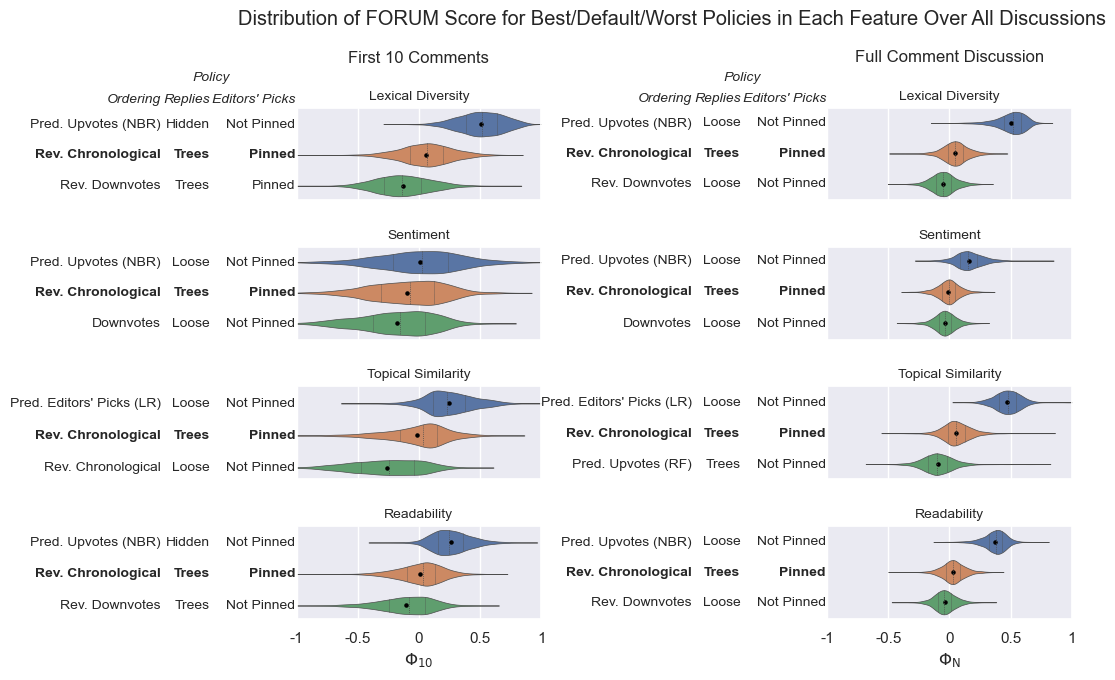

In [4]:
fig, axs = plt.subplots(4, 2, figsize=(10, 7), sharex=True)
for nc, n in enumerate(['10', 'N']):
    for nf, feat in enumerate(['lexdiv', 'sentclass', 'sim', 'smog']):
        ax = axs[nf, nc]
        if nf == 0:
            ax.text(0, -2, titles[n], ha='center')

        fn_df = q_df[(q_df['feature']==feat) & (q_df['n']==n)].copy()
        fn_df['sorting policy'] = fn_df['sorting policy'].apply(policynameparse)
        order = fn_df.groupby('sorting policy')['value'].mean().sort_values(ascending=False).index
        subset = (order[0], ('Rev. Chronological', 'Trees', 'Pinned'), order[-1])
        fn_df = fn_df[fn_df['sorting policy'].isin(subset)]

        # box and whisker plot by sorting policy
        sns.violinplot(data=fn_df, y='sorting policy', x='value', 
                       order=subset, inner='quart', linewidth=0.5, clip=(-1, 1),
                     ax=ax)
        # add axis gridlines at -0.5, 0.5
        ax.set_xticks([-1, -0.5, 0, 0.5, 1])
        ax.set_xticklabels([-1, -0.5, 0, 0.5, 1])
        ax.xaxis.grid(True)

        # add a dot for mean value
        ax.scatter(fn_df.groupby('sorting policy')['value'].mean().loc[list(subset)],
                   range(len(subset)), color='black', s=5)
        
        ax.set_yticklabels([])

        scale = 1
        cellw = 1.01
        cellx = 0.7
        celly = 0.4
        if nf==0:
                ax.text(-1.7, -1.5*scale, 'Policy', fontsize=10, style='italic',
                        ha='center', va='center')
                ax.text(-(cellw+cellx+celly), -0.8*scale, 'Ordering', fontsize=10, style='italic',
                        ha='right', va='center')
                ax.text(-(cellw+cellx), -0.8*scale, 'Replies', fontsize=10, style='italic',
                        ha='right', va='center')
                ax.text(-cellw, -0.8*scale, 'Editors\' Picks', fontsize=10, style='italic',
                        ha='right', va='center')
        for ix, p in enumerate(subset):
            if p == ('Rev. Chronological', 'Trees', 'Pinned'):
                weight = 'bold'
            else:
                weight = 'normal'

            ax.text(-(cellw+cellx+celly), ix*scale, p[0], fontsize=10, weight=weight,
                    ha='right', va='center')
            ax.text(-(cellw+cellx), ix*scale, p[1], fontsize=10, weight=weight,
                     ha='right', va='center')
            ax.text(-cellw, ix*scale, p[2], fontsize=10, weight=weight,
                     ha='right', va='center')

        ax.set_title(featnames[feat], fontsize=10)
        # make y label invisible
        ax.set_ylabel('')
        ax.set_xlabel('')
        
        ax.set_xlim(-1, 1)
    ax.set_xlabel('$\Phi_{\\text{%s}}$' %n)
fig.suptitle('Distribution of FORUM Score for Best/Default/Worst Policies in Each Feature Over All Discussions')
fig.subplots_adjust(wspace=1.17, hspace=0.5, top=0.84)
#     fig.tight_layout()
# plt.savefig('figs/qdist_best_default_worst.pdf', bbox_inches='tight')
plt.show()

/Users/Patrick/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/Patrick/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/Patrick/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/Patrick/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, Catego

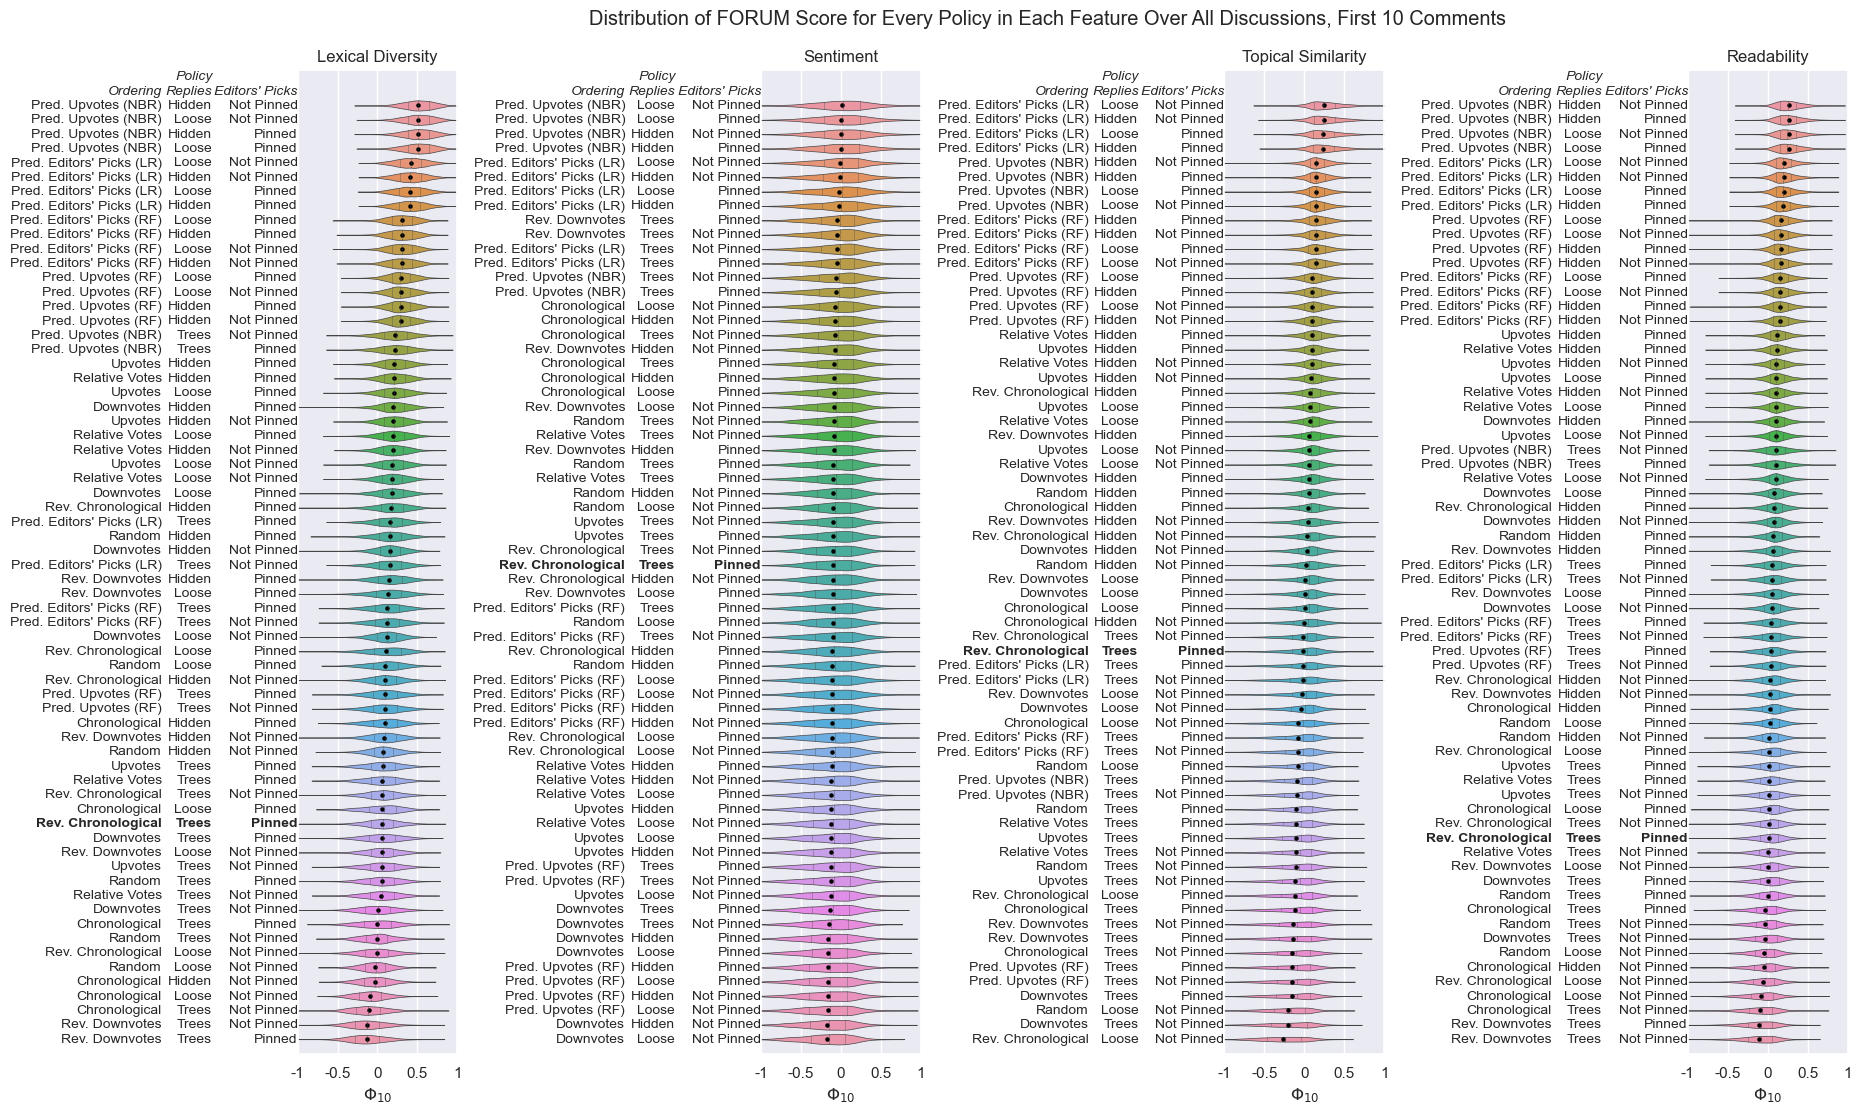

/Users/Patrick/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/Patrick/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/Patrick/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/Patrick/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, Catego

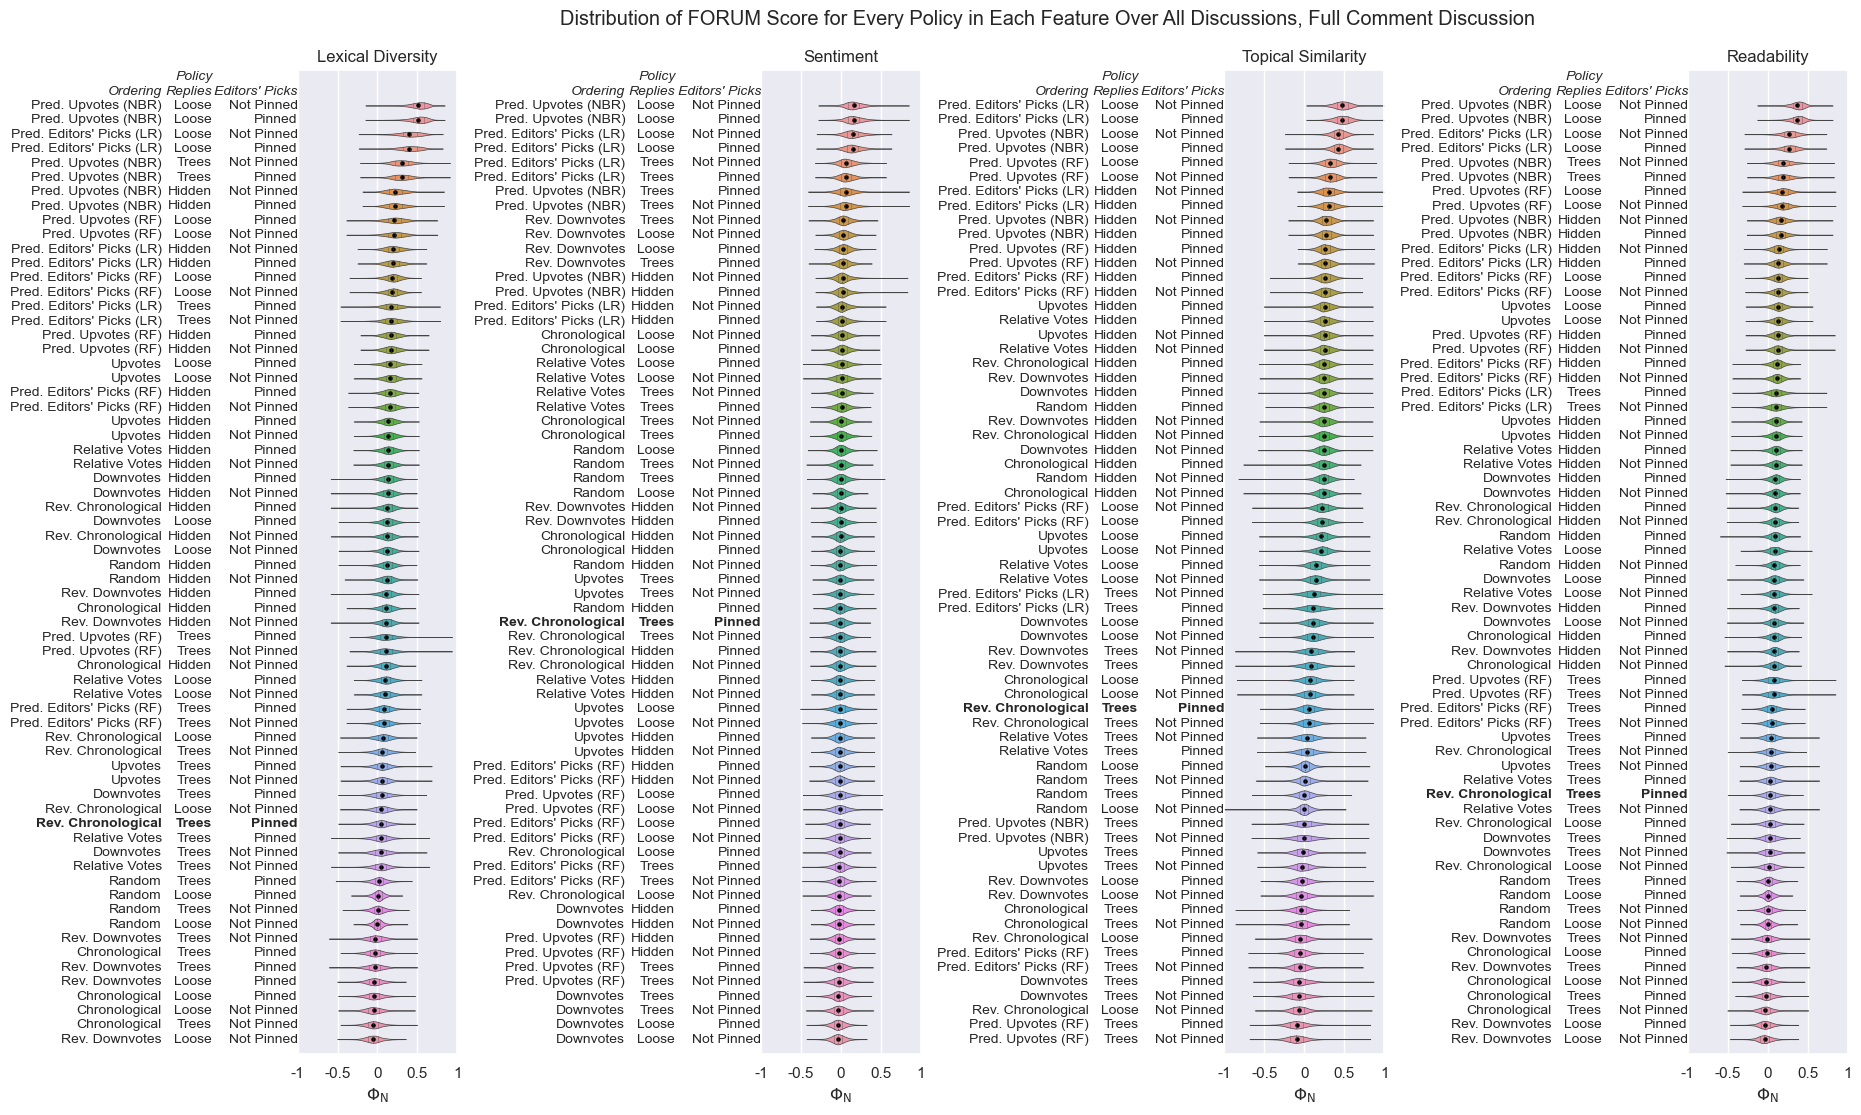

In [5]:
for n in ['10', 'N']:
    fig, axs = plt.subplots(1, 4, figsize=(20, 12))
    for nf, feat in enumerate(['lexdiv', 'sentclass', 'sim', 'smog']):
        ax = axs[nf]

        fn_df = q_df[(q_df['feature']==feat) & (q_df['n']==n)].copy()
        fn_df['sorting policy'] = fn_df['sorting policy'].apply(policynameparse)
        order = fn_df.groupby('sorting policy')['value'].mean().sort_values(ascending=False).index

        # box and whisker plot by sorting policy
        sns.violinplot(data=fn_df, y='sorting policy', x='value', 
                       order=order, inner='quart', linewidth=0.5, clip=(-1, 1),
                     ax=ax)
        # add axis gridlines at -0.5, 0.5
        ax.set_xticks([-1, -0.5, 0, 0.5, 1])
        ax.set_xticklabels([-1, -0.5, 0, 0.5, 1])
        ax.xaxis.grid(True)

        # add a dot for mean value
        ax.scatter(fn_df.groupby('sorting policy')['value'].mean().loc[order],
                   range(len(order)), color='black', s=5)
        
        ax.set_yticklabels([])

        scale = 1
        cellw = 1
        cellx = 1.075
        celly = 1.7
        ax.text(-2.3, -2*scale, 'Policy', fontsize=10, style='italic',
                ha='center', va='center')
        ax.text(-(cellw+celly), -scale, 'Ordering', fontsize=10, style='italic',
                ha='right', va='center')
        ax.text(-(cellw+cellx), -scale, 'Replies', fontsize=10, style='italic',
                ha='right', va='center')
        ax.text(-cellw, -scale, 'Editors\' Picks', fontsize=10, style='italic',
                ha='right', va='center')
        for ix, p in enumerate(order):
            if p == ('Rev. Chronological', 'Trees', 'Pinned'):
                weight = 'bold'
            else:
                weight = 'normal'

            ax.text(-(cellw+celly), ix*scale, p[0], fontsize=10, weight=weight,
                    ha='right', va='center')
            ax.text(-(cellw+cellx), ix*scale, p[1], fontsize=10, weight=weight,
                     ha='right', va='center')
            ax.text(-cellw, ix*scale, p[2], fontsize=10, weight=weight,
                     ha='right', va='center')

        ax.set_title(featnames[feat])
        # make y label invisible
        ax.set_ylabel('')
        
        ax.set_xlabel('$\Phi_{\\text{%s}}$' %n)
        ax.set_xlim(-1, 1)
        ax.set_ylim(len(order), -2.5)
    fig.suptitle(f'Distribution of FORUM Score for Every Policy in Each Feature Over All Discussions, {titles[n]}')
    fig.subplots_adjust(wspace=1.9, top=0.93)
#     plt.savefig(f'figs/qdist_all_{n}.pdf', bbox_inches='tight')
    plt.show()
